<a href="https://colab.research.google.com/github/JMML2021/Tasca-M6-T01-ML_regressions-/blob/main/Sprint_6_Algoritmes_d%E2%80%99aprenentatge_supervisat_Regressi%C3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [7]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Abro el fichero

#path='https://drive.google.com/file/d/1j8WdhTxMpngrUigfcfrJynng-9JHo9xa/view?usp=sharing'
path = ('/content/drive/MyDrive/01_COLAB/housing data.csv')
#data = pd.read_csv(file,
    
df=  pd.read_csv(path, sep=',', encoding="latin-1")
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')
df1=df.copy()
print('\nImprimo el primer registro, solo para ver como es:\n')
df1.iloc[0]

Hay  505 filas con 14 columnas

Imprimo el primer registro, solo para ver como es:



0.00632      0.02731
18.00        0.00000
2.310        7.07000
0            0.00000
0.5380       0.46900
6.5750       6.42100
65.20       78.90000
4.0900       4.96710
1            2.00000
296.0      242.00000
15.30       17.80000
396.90     396.90000
4.98         9.14000
24.00       21.60000
Name: 0, dtype: float64

In [9]:
# Asigno una lista con los nombres de las columnas
Nombre_Columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df1.columns = [Nombre_Columnas]
df1.iloc[0]

CRIM         0.02731
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           6.42100
AGE         78.90000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          396.90000
LSTAT        9.14000
MEDV        21.60000
Name: 0, dtype: float64

To know more about the features use boston_dataset.**DESCR The description of all the features is given below:**

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [10]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [32]:
from sklearn.model_selection import train_test_split   
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT' ]
 
x = df1.loc[:, features]
y = df1.loc[:, ['MEDV']]
    
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, 
                                                    random_state = 0) 
   
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape)

xtrain shape :  (404, 13)
xtest shape  :  (101, 13)
ytrain shape :  (404, 1)
ytest shape  :  (101, 1)


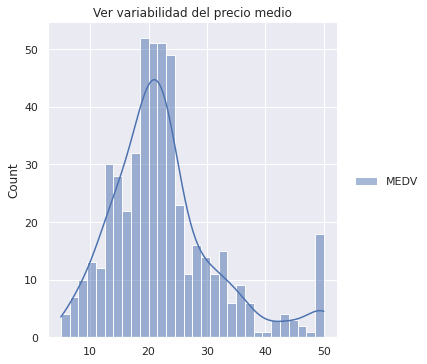

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(y, bins=30, kde = True)
plt.title('Ver variabilidad del precio medio')
plt.show()

**VERDE **
l


ttps://www.kaggle.com/code/deuterium06/boston-housing-linear-regression/notebook

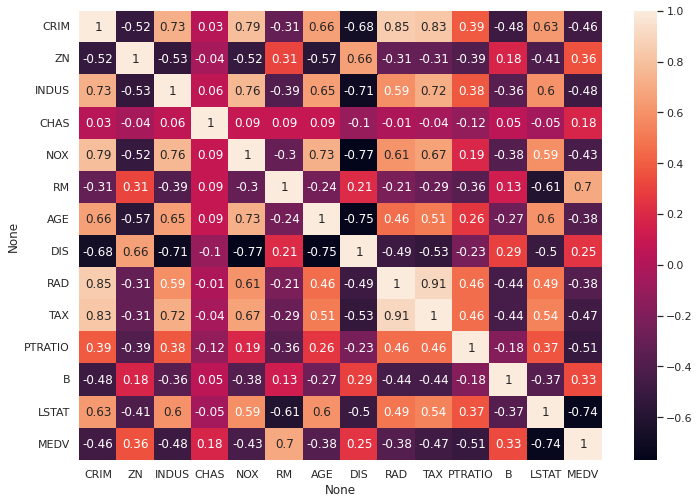

In [79]:
correlation_matrix = df1.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [81]:
columns_sorted = df1.corr().abs().nlargest(14, 'MEDV').index
correlation_sorted = np.corrcoef(df1[columns_sorted].values.T)

f, ax = plt.subplots(figsize = (9,7.5))
hm = sns.heatmap(abs(correlation_sorted), annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns_sorted.values, xticklabels=columns_sorted.values, cmap='summer')
plt.show()

AttributeError: ignored

In [95]:
df2= pd.DataFrame(df1)
sns.boxplot(df2['RAD'], df2['MEDV'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

In [85]:
df1['MEDV'],

(     MEDV
 0    21.6
 1    34.7
 2    33.4
 3    36.2
 4    28.7
 ..    ...
 500  22.4
 501  20.6
 502  23.9
 503  22.0
 504  11.9
 
 [505 rows x 1 columns],)

In [89]:
#sns.boxplot(df1['RAD'], df1['MEDV'])
#sns.catplot( x= 'RAD', y = 'MEDV', data = df1, kind = "box")
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-3.600502,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,-3.601235,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,-3.430523,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,-2.672924,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,-3.511570,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,-2.770511,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,-3.095111,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,-2.800824,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,-2.211009,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


**Observaciones:**
Para ajustar un modelo de regresión lineal, seleccionamos aquellas características que tienen una alta correlación con nuestra variable objetivo MEDV. Al observar la matriz de correlación, podemos ver que RM tiene una fuerte correlación positiva con MEDV (0,7), mientras que LSTAT tiene una alta correlación negativa con MEDV (-0,74).

Un punto importante en la selección de características para un modelo de regresión lineal es comprobar la multicolinealidad. Las características RAD, TAX tienen una correlación de 0,91. Estos pares de características están fuertemente correlacionados entre sí. No debemos seleccionar ambas características juntas para entrenar el modelo. Compruebe esto para obtener una explicación. Lo mismo ocurre con las funciones DIS y AGE, que tienen una correlación de -0,75.

En base a las observaciones anteriores, utilizaremos RM y LSTAT como nuestras características. Usando un gráfico de dispersión, veamos cómo varían estas características con MEDV.

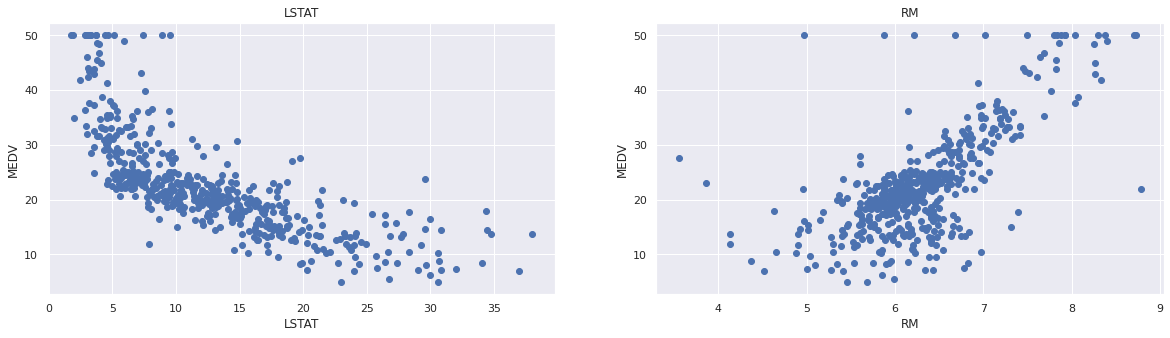

In [40]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df1['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df1[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

**Observaciones:**
Los precios aumentan a medida que el valor de RM aumenta linealmente. Hay pocos valores atípicos y los datos parecen tener un límite de 50.
Los precios tienden a disminuir con un aumento en LSTAT. Aunque no parece estar siguiendo exactamente una línea lineal.

In [43]:
X = pd.DataFrame(np.c_[df1['LSTAT'], df1['RM']], columns = ['LSTAT','RM'])
Y = df1['MEDV']

In [44]:
#from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(101, 2)
(404, 1)
(101, 1)


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [51]:
# model evaluation for training set

from sklearn.metrics import r2_score

y_train_predict = lin_model.predict(X_train)
rmse = round((np.sqrt(mean_squared_error(Y_train, y_train_predict))),2)
r2 = round(r2_score(Y_train, y_train_predict),2)

print("El modelo para el dataset de training da: ")
print("--------------------------------------")
print('error cuadrático medio (RMSE) es {}'.format(rmse))
print('R2 score es {}'.format(r2))
print("\n")

# Evaluacion del modelo de set
y_test_predict = lin_model.predict(X_test)
rmse = round((np.sqrt(mean_squared_error(Y_test, y_test_predict))),2)
r2 = round(r2_score(Y_test, y_test_predict),2)

print("el modelo para el dataset de Test da")
print("--------------------------------------")
print('error cuadrático medio (RMSE) es {}'.format(rmse))
print('R2 El valor es {}'.format(r2))

El modelo para el dataset de training da: 
--------------------------------------
error cuadrático medio (RMSE) es 5.74
R2 score es 0.64


el modelo para el dataset de Test da
--------------------------------------
error cuadrático medio (RMSE) es 4.62
R2 El valor es 0.62


In [53]:
import pandas.util.testing as tm


In [57]:
X = df1["RM"]
y = target["MEDV"]

import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

# Note the difference in argument order
model = RollingOLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

ModuleNotFoundError: ignored

In [59]:
window = 1000
a = np.array([np.nan] * len(df))
b = [np.nan] * len(df)  # If betas required.
#y_ = df.y.values
y_ = target["MEDV"]
#x_ = df[['x']].assign(constant=1).values
x_ = df1["RM"]
for n in range(window, len(df)):
    y = y_[(n - window):n]
    X = x_[(n - window):n]
    # betas = Inverse(X'.X).X'.y
    betas = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    y_hat = betas.dot(x_[n, :])
    a[n] = y_hat
    b[n] = betas.tolist()  # If betas required.

https://nsamrao.github.io/Boston_Housing/

In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [68]:
bos1 = df1
bos1['CRIM'] = np.log(bos1['CRIM'])

In [69]:
m = ols('PRICE ~ PTRATIO + NOX + RM + LSTAT + DIS ',bos1).fit()
print(m.summary())

PatsyError: ignored

In [ ]:
Nombre_Columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [74]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below

X = df1["RM"]
y = target["MEDV"]
m = ols(y,X).fit()
print(m.summary())

PatsyError: ignored

In [77]:
  import pandas.util.testing as tm
  data = pd.DataFrame({"y": target["MEDV"], "x": df1["RM"]}, index=[5, 3, 1])
  results = ols('y ~ x', data).fit()

ValueError: ignored

FOREST

In [133]:
X = pd.DataFrame(np.c_[df1['LSTAT'], df1['RM']], columns = ['LSTAT','RM'])
Y = df1['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)


# Random Forest 

In [134]:
from sklearn.ensemble import RandomForestRegressor

feats = ['LSTAT', 'RM']
m = RandomForestRegressor(n_jobs = -1, oob_score = True)
m.fit(X_train, Y_train)
print('m: ', m)
feat_imps = m.feature_importances_

print(' feat_imps', feat_imps)

score = round(m.score(X_train, Y_train),2)
print('Score: ', score)

ypredict = (m.predict(X_test))
Y_test=Y_test.to_numpy()

type(ypredict)
type(Y_test)
mae = np.mean(np.absolute(Y_test - ypredict))
#mae= np.absolute (Y_test - ypredict)
#mae_percent = np.mean(np.absolute(ytest - ypredict) / ytest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


m:  RandomForestRegressor(n_jobs=-1, oob_score=True)
 feat_imps [0.5400141 0.4599859]
Score:  0.96


 clf = RandomForestRegressor()
    clf.fit(xtrain, ytrain)

    score = clf.score(xtest, ytest)

    feat_imps = clf.feature_importances_

    ypredict = clf.predict(xtest)


    mae = np.mean(np.absolute(ytest - ypredict))
    mae_percent = np.mean(np.absolute(ytest - ypredict) / ytest)
    return (
      
        "R^2 is ",
        score,
        "MAE is ",
        mae,
        "MAE percent is ",
        mae_percent,
        "Feature Importances are ",
        zip(feature_names, feat_imps),

**Fitting Linear Regression using statsmodels**


https://github.com/shashankvmaiya/Boston-Housing-Price-Prediction/blob/master/Mini_Project_Linear_Regression.ipynb


**RESIDUOS:**


https://colab.research.google.com/github/RPI-DATA/course-intro-ml-app/blob/master/content/notebooks/12-intro-modeling-2/02-regression-boston-housing-python.ipynb